In [7]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



# First Thermal model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/training/train/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/testing/test/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/training/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/testing/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape

# #Secound Camera model

# image_list = []

# def my_load_Train_data_2() :
#     image_list = []
#     for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/train/training/*.jpg'): #assuming gif
#         im=Image.open(filename)
#         img = im.resize((32,32),Image.ANTIALIAS)
#         img= tf.keras.preprocessing.image.img_to_array(img)
#         img= img.reshape(32, 32, 3)
#         img =img.astype('float32')
#         img = img / 255.0
#         image_list.append(img)

#     return image_list

# def my_load_Test_data_2() :
#     image_list = []
#     for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/test/testing/*.jpg'): #assuming gif
#         im=Image.open(filename)
#         img = im.resize((32,32),Image.ANTIALIAS)
#         img= tf.keras.preprocessing.image.img_to_array(img)
#         img= img.reshape(32, 32, 3)
#         img =img.astype('float32')
#         img = img / 255.0
#         image_list.append(img)

#     return image_list

# X2_train = my_load_Train_data_2()
# X2_test = my_load_Test_data_2()
# print(len(X2_test))
# y2_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_labels.csv')
# y2_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_test_labels.csv')
# y2_test.values.reshape(-1,1)

# n_classes = 4
# X2_train = np.array(X2_train)
# Y2_train = np.array(y2_train)
# X2_test = np.array(X2_test)
# Y2_test = np.array(y2_test)

# Y2_train = np_utils.to_categorical(Y2_train, n_classes)
# Y2_test = np_utils.to_categorical(Y2_test, n_classes)


# Model 1(Thermal)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
#output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)

# # Model 2

# # convolutional layer
# inp2 = Input(shape=(32, 32, 3))

# # convolutional layer
# conv1 =Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp2)

# # convolutional layer
# conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
# pool1=MaxPool2D(pool_size=(2,2))(conv2)
# conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
# pool2=MaxPool2D(pool_size=(2,2))(conv3)

# # flatten output of conv
# flat1=Flatten()(pool2)

# # hidden layer
# hidd1=Dense(25, activation='relu')(flat1)
# dense2=Dense(10, activation='relu')(hidd1)
# output2=Flatten()(dense2)

# for thermal model
dense_thermal=Dense(8,activation='softmax')(dense1)
output_thermal = dense_thermal


# # concatinate two models 

# concat1 = concatenate([output1, output2])
# Out  = Dense(4, activation='softmax')(concat1)

# model_concat = Model(inputs=[inp1, inp2], outputs = Out)

# # compiling the sequential model
# model_concat.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 


# # training the model for 10 epochs
# history= model_concat.fit([X1_train,X2_train],Y2_train, batch_size=128,epochs=15,validation_data=([X1_test,X2_test],Y2_test))


# thermal model

model_thermal = Model(inputs= inp1, outputs = output_thermal)
model_thermal.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history= model_thermal.fit(X1_train,Y1_train, batch_size=128,epochs=20,validation_data=(X1_test,Y1_test))



Epoch 1/20
16/16 [==============================] - 17s 1s/step - loss: 1.9894 - accuracy: 0.1860 - val_loss: 1.9326 - val_accuracy: 0.2350
Epoch 2/20
16/16 [==============================] - 21s 1s/step - loss: 1.6536 - accuracy: 0.3945 - val_loss: 1.6417 - val_accuracy: 0.3900
Epoch 3/20
16/16 [==============================] - 22s 1s/step - loss: 1.4069 - accuracy: 0.4920 - val_loss: 1.3790 - val_accuracy: 0.4675
Epoch 4/20
16/16 [==============================] - 21s 1s/step - loss: 1.2280 - accuracy: 0.5355 - val_loss: 1.4161 - val_accuracy: 0.5125
Epoch 5/20
16/16 [==============================] - 24s 2s/step - loss: 1.1120 - accuracy: 0.6060 - val_loss: 1.2120 - val_accuracy: 0.5100
Epoch 6/20
16/16 [==============================] - 23s 1s/step - loss: 1.0033 - accuracy: 0.6425 - val_loss: 1.1118 - val_accuracy: 0.6000
Epoch 7/20
16/16 [==============================] - 25s 2s/step - loss: 0.9203 - accuracy: 0.6785 - val_loss: 1.1634 - val_accuracy: 0.5950
Epoch 8/20
16/16 [==

In [8]:

#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_thermal.evaluate(X1_test,Y1_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

4/4 [==============================] - 1s 147ms/step - loss: 1.2214 - accuracy: 0.6950
[INFO] Accuracy: 69.50%
[INFO] Loss: 1.2213538885116577
Time:  0:00:00.926101


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


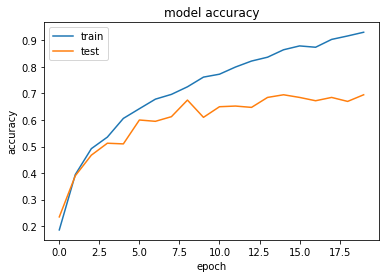

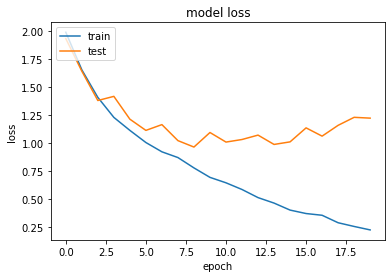

In [9]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:
# make a prediction for a new thermal image.

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ListPic = {'thermal_spectacle261.jpg','thermal_laptop258.jpg','thermal_bottle215.jpg','thermal_table251.jpg',
           'thermal_sofa283.jpg','thermal_plate260.jpg','thermal_bed254.jpg','thermal_chair261.jpg'}


for item in ListPic:
 # load the image thermal
 img1 = load_img(item, target_size=(32, 32))

 # convert to array
 img1 = img_to_array(img1)

 # reshape into a single sample with 3 channels
 img1 = img1.reshape(1,32, 32, 3)

 # prepare pixel data
 img1 = img1.astype('float32')
 img1 = img1 / 255.0

 # prediction od data
 result = model_thermal.predict(img1)

 
 print('Input image:',item)
 #print(result)
 print('')
 print("probality of Bed: ", result[0][0]*100)
 print()
 print("probality of Bottle: ", result[0][1]*100)
 print()
 print("probality of chair: ", result[0][2]*100)
 print()
 print("probality of Laptop: ", result[0][3]*100)
 print()
 print("probality of Plate: ", result[0][4]*100)
 print()
 print("probality of Sofa: ", result[0][5]*100)
 print()
 print("probality of Spectacle: ", result[0][6]*100)
 print()
 print("probality of Table: ", result[0][7]*100)
 print("__________________________________________________________________")
    
 

Input image: thermal_chair261.jpg

probality of Bed:  0.5597575102001429

probality of Bottle:  2.739560898135096e-05

probality of chair:  40.63774347305298

probality of Laptop:  56.44518733024597

probality of Plate:  0.03652434970717877

probality of Sofa:  0.48132389783859253

probality of Spectacle:  1.4239069074392319

probality of Table:  0.4155258648097515
__________________________________________________________________
Input image: thermal_bed254.jpg

probality of Bed:  20.460033416748047

probality of Bottle:  7.307527472022457e-07

probality of chair:  0.013079399650450796

probality of Laptop:  0.05593327805399895

probality of Plate:  6.767761264597771e-11

probality of Sofa:  71.23479843139648

probality of Spectacle:  8.236049115657806

probality of Table:  0.00010325443327019457
__________________________________________________________________
Input image: thermal_spectacle261.jpg

probality of Bed:  1.588592678308487

probality of Bottle:  0.005239389429334551

pro